In [32]:
#Import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [33]:
#Load in Data
df = pd.read_excel('Hospital_dataset.xlsx')

In [34]:
df.head()

,Xray,BedDays,Length,Hours
0,2463,472.92,4.45,566.52
1,2048,1339.75,6.92,696.82
2,3940,620.25,4.28,1033.15
3,6505,568.33,3.90,1603.62
4,5723,1497.60,5.50,1611.37


In [35]:
#Correlation 
df.corr()['Hours'].sort_values(ascending=False)

Hours      1.000000
BedDays    0.985992
Xray       0.945173
Length     0.578580
Name: Hours, dtype: float64

In [36]:
#Create x and y values
X = df[['Xray','BedDays','Length']]
y = df['Hours']

<AxesSubplot:xlabel='Xray', ylabel='Hours'>

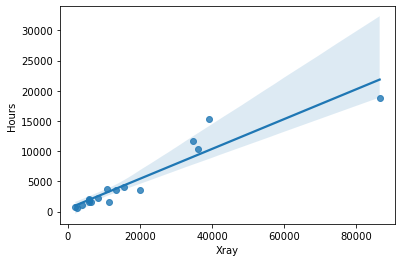

In [37]:
#XRays vs. Hours Regplot 
sns.regplot(x='Xray',y='Hours',data=df)

<AxesSubplot:xlabel='BedDays', ylabel='Hours'>

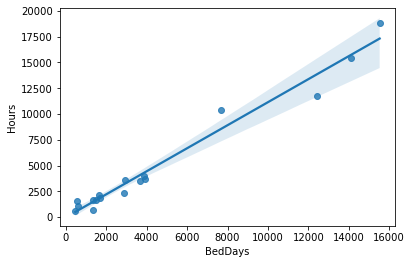

In [38]:
#BedDays vs. Hours regplot 
sns.regplot(x='BedDays',y='Hours',data=df)

<AxesSubplot:xlabel='Length', ylabel='Hours'>

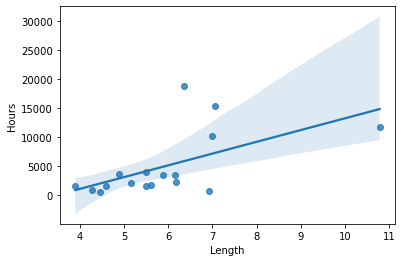

In [39]:
#Length vs. Hours Regplot 
sns.regplot(x='Length',y='Hours',data=df)

Fitting a Multiple Linear Regression Model using LinearRegression()

In [40]:
#Linear Regression model 
lm  = LinearRegression()
lm.fit(X,y)

#R^2 
print('The R^2 value is:', lm.score(X,y))

The R^2 value is: 0.9900681747467439


In [44]:
#Predictions | Error
predictions = lm.predict(X)

print(predictions)

[  688.40938033   721.84831963   965.3930018   1172.46404842
  1526.78024803  1993.86901363  1676.55785745  1791.4054233
  2798.76102497  4191.33347911  3190.95715788  4364.50214339
  4364.22877732  8713.30742403 12080.8637025  15133.02637061
 19260.4526276 ]


Using Statsmodels to fit a Linear Regression

In [49]:
# Fit the model
y= df['Hours']
x = df[['Xray','BedDays','Length']]

model = ols("y ~ x", df).fit()

# Print the summary
print(model.summary())

# Peform analysis of variance on fitted linear model
anova = anova_lm(model)

print('\nANOVA results')
print(anova)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     432.0
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           2.89e-13
Time:                        09:08:02   Log-Likelihood:                -131.00
No. Observations:                  17   AIC:                             270.0
Df Residuals:                      13   BIC:                             273.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1523.3892    786.898      1.936      0.0

C:\Users\Ben\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [50]:
#Parameter Values
print('The intercept is',model.params[0])
print('The beta 1 coefficient is',model.params[1])
print('The beta 2 coefficient is', model.params[2])
print('The beta 3 coefficent is', model.params[3])

The intercept is 1523.3892356760002
The beta 1 coefficient is 0.05298732886683016
The beta 2 coefficient is 0.9784816157566385
The beta 3 coefficent is -320.9508251836977


In [51]:
#Making a prediction for X = (56194,14077.88,6.89)

x_rays = 56194
bed_days = 14077.88
length = 6.89

pred = model.params[0] + model.params[1]*x_rays + model.params[2]*bed_days + model.params[3]*length
print('The prediction is',pred, 'hours.')

The prediction is 16064.554777331045 hours.
